**Theory Part** 
![alt text](https://drive.google.com/uc?id=10w12ejOZ-Uu-sF--k2YFBCxZTp1XPDwZ)
![alt text](https://drive.google.com/uc?id=1L8I0zhDlzQctPrOtauO3vnMy_HxsapG6)
![alt text](https://drive.google.com/uc?id=1lnApypFFh3D5u6QOar-V46CizcIkPkfE)

Firstly I import the libraries.
I use pickle for reusing the data without the changes original.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import torch
import torchvision
import torchvision.transforms as transforms
import pickle
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


I read the Train_Info.csv and set the index to Id
And find the output size of nn's

In [3]:
df = pd.read_csv('Train_Info.csv')

df.set_index("Id", inplace= True)

n_of_classes = np.unique(df['Class'].values).shape[0]
n_of_classes

683

I find the paths of images and put them into dataframe

In [4]:
DATADIR = "train_resized"
CATEGORIES = ""

paths = []
df['Path'] = -1
for img in os.listdir(DATADIR):
  try:   
    index = int(img.split(".")[0])
    df['Path'].iloc[index] = os.path.join(DATADIR, img)

  except Exception as e:
    pass
    
df

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Class,Path
Id,,
0,0,train_resized/0.jpg
1,0,train_resized/1.jpg
2,0,train_resized/2.jpg
3,0,train_resized/3.jpg
4,0,train_resized/4.jpg
...,...,...
34220,99,train_resized/34220.jpg
34221,99,train_resized/34221.jpg
34222,99,train_resized/34222.jpg


I shuffled the data and split to third parts:
Test, Validation, Train.
Also I split the data into features and labels.
Note: Deneme is for quick control of nn's working.


In [0]:
# Shuffle Data 
tf = randomData = df.iloc[np.random.permutation(len(df))]

# Splitting Data into Train Val and Test Set
features, targets = tf.drop('Class', axis=1), tf['Class'] 
targets = targets.values.reshape(-1, 1) # reshaping to numpy n x 1 matrix

test_X, test_y = features[-3000:], targets[-3000:]
val_X, val_y = features[-6000:-3000], targets[-6000:-3000]
train_X, train_y = features[:-6000], targets[:-6000]

denemeTest_X, denemeTest_y = features[-500:], targets[-500:]
denemeVal_X, denemeVal_y = features[-1000:-500], targets[-1000:-500]
denemeTrain_X, denemeTrain_y = features[-2000:-1000], targets[-2000:-1000]



In [0]:
# plt.figure()
# plt.imshow(new_array) 
# plt.show()


With pickle library I save original file in drive.
And use the copy of them.

In [0]:
# Creating the files containing all the information about your model
pickle_out = open("train_X.pickle", "wb")
pickle.dump(train_X, pickle_out)
pickle_out.close()

pickle_out = open("train_y.pickle", "wb")
pickle.dump(train_y, pickle_out)
pickle_out.close()

pickle_out = open("val_X.pickle", "wb")
pickle.dump(val_X, pickle_out)
pickle_out.close()

pickle_out = open("val_y.pickle", "wb")
pickle.dump(val_y, pickle_out)
pickle_out.close()

pickle_out = open("test_X.pickle", "wb")
pickle.dump(test_X, pickle_out)
pickle_out.close()

pickle_out = open("test_y.pickle", "wb")
pickle.dump(test_y, pickle_out)
pickle_out.close()




Load data to use

In [0]:
# Opening the files about data
train_X = pickle.load(open("train_X.pickle", "rb"))
train_y = pickle.load(open("train_y.pickle", "rb"))
val_X = pickle.load(open("val_X.pickle", "rb"))
val_y = pickle.load(open("val_y.pickle", "rb"))
test_X = pickle.load(open("test_X.pickle", "rb"))
test_y = pickle.load(open("test_y.pickle", "rb"))

This DataLoader function is get the dataframe before the running Neural Network and finds image from path in dataframe. 
It then reshapes the picture according to the given resolution. And turning it into grayscale. Because of to Grayscale, the 3D data in each pixel is reduced to a single dimension. Finally, using the flatten function, the image is reduced to a single size and normalized so that the values ​​are between 0 and 1.

In [0]:
IMG_SIZE_X = 37
IMG_SIZE_Y = 37
def DataLoader(Data):
  Data = Data.values 
  dataList = []

  for img in Data:
      img_array = cv2.imread(img[0], 0)
      new_array = cv2.resize(img_array, (IMG_SIZE_X, IMG_SIZE_Y))
      new_array = new_array/255.0
      dataList.append(new_array.flatten())

  Data = np.array(dataList) 
  print('Bitti')
  return Data



Our labels is a single number like 483. We have to change into array which is contains all zero except the class number index. It takes all data and converge all of them in ones.

In [9]:
def GetLabel(Data):
  newList = []
  for i in range(Data.shape[0]):
    temp = np.zeros(n_of_classes)
    temp[Data[i][0]] = 1
    newList.append(temp)
  Data = np.array(newList)
  return Data

GetLabel(denemeTrain_y)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

This are activation functions of Neural Networks. There are also prime functions each of them. \
\
The activation functions are a mathematical “gate”s in between the inputs feedings the current neurons and its outputw going to the next layers. \
\
Neural networks use the non-linear activation functions which can help the network learn complex data, compute and provide accurate predictions.


1.   Sigmoid\
![alt text](https://missinglink.ai/wp-content/uploads/2018/11/sigmoidlogisticgraph.png)\
Range: 0 and 1\
Used as an output for models that we need to estimate the probability.

2.   Tanh\
![alt text](https://missinglink.ai/wp-content/uploads/2018/11/tanhhyperbolic.png)\
It's like to sigmoid function but there is a advantage. Zero Centered.\
Make it easier to model inputs that have strongly negative, neutral, and strongly positive values.

3.   ReLU \
![alt text](https://missinglink.ai/wp-content/uploads/2018/11/relu.png)\
When input zero or negative gradient of the function becomes zero. \
So the network cannot perform backpropagation and cannot learn either.\
But allows to network converge very quickly.

4.   SoftMax\
![alt text](https://missinglink.ai/wp-content/uploads/2018/11/softmax.png)\
This is used for output functions\
It can able to handle multiple class













In [10]:
# Activation functions
def sigmoid(x):
	return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x):
	return sigmoid(x)*(1.0-sigmoid(x))

def tanh(x):
	return np.tanh(x)

def tanh_prime(x):
	return 1.0 - x**2

def softmax(x):
    return (np.exp(np.array(x)) / np.sum(np.exp(np.array(x))))

def softmax_prime(x):
    return softmax(x)*(1.0-softmax(x))

def relu(X):
   return np.maximum(0,X)

def relu_prime(x):
    return np.where(x > 0, 1.0, 0.0)


std = 0.001
(std * np.random.randn(47*47, 100)).shape
denemeTrain_y.shape




(1000, 1)

This is single layer neural network. It starts with activation function as a sigmoid and output function is softmax.\
There is a single layer so it has one bias and weights value.\
While moving forward in the neural network, it keeps the output value in the cache. Then we will reuse this value in the backward prop. Because we want to train this model. Our model works at first until it outputs. Then, according to the number of epochs entered, our model will start to go back. We will change the weights and bias according to the values ​​from the backward propagation and will move to forward propagation. It keeps like that. Finally this function gives us a Loss and Accuracy. It compute loss with Cross Entropy Loss function.\

Single Layer Neural Networks can compute simple functions. It can not compute complex functions. But it's computation time is very fast.


In [0]:
class NeuralNetwork(object):
  def __init__(self, input_size, output_size, learning_rate, activation_func = 'sigmoid', output_func = 'softmax'): 
    
    self.parameters = {}
    self.parameters['Weight1'] = std * np.random.randn(input_size, output_size)
    self.parameters['Bias1']   = std * np.random.randn(output_size)  + 0.5  

    # Hidden layer activation function
    if activation_func == 'sigmoid':
      self.activation_func = sigmoid
      self.activation_func_reverse = sigmoid_prime
    elif activation_func == 'tanh':
      self.activation_func = tanh
      self.activation_func_reverse = tanh_prime
    elif activation_func == 'relu':
      self.activation_func = relu
      self.activation_func_reverse = relu_prime

		# Output layer activation function
    if output_func == 'sigmoid':
      self.output_func = sigmoid
      self.output_func_reverse = sigmoid_prime
    elif output_func == 'tanh':
      self.output_func = tanh
      self.output_func_reverse = tanh_prime
    elif output_func == 'relu':
      self.output_func = relu
      self.output_func_reverse = relu_prime
    elif output_func == 'softmax':
      self.output_func = softmax
      self.output_func_reverse = softmax_prime

  def forward_prop(self, train_data):
    cache_for_backp = {}
    n_of_data = train_data.shape[0]

    Weight1 = self.parameters['Weight1']
    Bias1   = self.parameters['Bias1']

    logits = np.matmul(train_data, Weight1) + Bias1.T

    output = np.array(self.output_func(logits)).reshape(n_of_data, n_of_classes)

    cache_for_backp['output'] = output

    return cache_for_backp, output
  
  def backward_prop(self, train_data, train_label, cache_for_backp):
    derivatives = {}

    output = cache_for_backp['output']

    Weight1 = self.parameters['Weight1']

    #Error Calculation
    error_output = output - GetLabel(train_label)
    output_delta = error_output * self.output_func_reverse(output)

    #Calculation of Partial Derivatives
    partial_derivatives1 = np.matmul(train_data.T, output_delta) / len(train_data)

    #Store the Derivatives
    derivatives['partial_derivatives1'] = partial_derivatives1
    
    return derivatives

  def update_parameters(self, derivatives):
    Weight1 = self.parameters['Weight1']

    #Get the Derivatives
    partial_derivatives1 = derivatives['partial_derivatives1']

    #Update the Derivatives
    Weight1 -= (learning_rate * (partial_derivatives1 + beta * Weight1))
    
    #Update the Dictionary
    self.parameters['Weight1'] = Weight1
    
    return self.parameters

  #Calculation of Loss and Accuracy
  def calculate_loss_accuracy(self, train_data, train_label, prediction):
    Weight1 = self.parameters['Weight1']

    log_pred = np.log(prediction)
    log_pred_neg = np.log(1-prediction)
    len_train_label = len(train_label)
    loss = -1 * np.sum(np.multiply(log_pred, train_label) + np.multiply(log_pred_neg , (1-train_label))) / len_train_label + np.sum(Weight1**2) * beta / len_train_label
    
    accuracy = np.sum(np.argmax(train_label, axis=1) == np.argmax(prediction, axis=1))
    accuracy /= len(train_data)
    
    return loss,accuracy
  
  def train(self, train_data, train_label, epochs = 2):
    #Store loss for each epoch
    LossList = []

    #Parameters
    Weight1 = self.parameters['Weight1']
    Bias1   = self.parameters['Bias1']

    final_predict = []
    
    for i in range(epochs):
      #Forward Propogation
      cache_for_backp, output = self.forward_prop(train_data)

      #Backward Propogation
      derivatives = self.backward_prop(train_data, train_label, cache_for_backp)

      #Calculate the Loss and Accuracy
      loss, accuracy = self.calculate_loss_accuracy(train_data, train_label, output)

      #Update the Parameters
      self.parameters = self.update_parameters(derivatives)

      LossList.append(loss)

      final_predict = output

      #print accuracy and loss
      if(i%10==0):
          print("Step : " , LossList)
          print("Loss %f"%loss)
          print("Accuracy %f%%"%(accuracy*100))
    
    return LossList, final_predict


This neural network has a one hidden layer. 

In [0]:
class NeuralNetwork1Hidden(object):
  def __init__(self, input_size, hidden_size1, output_size, learning_rate, activation_func = 'sigmoid', output_func = 'softmax'): 
    
    self.parameters = {}
    self.parameters['Weight1'] = std * np.random.randn(input_size, hidden_size1)
    self.parameters['Bias1']   = std * np.random.randn(hidden_size1)  + 0.5  
    self.parameters['Weight2'] = std * np.random.randn(hidden_size1, output_size)
    self.parameters['Bias2']   = np.zeros(output_size)

    # Hidden layer activation function
    if activation_func == 'sigmoid':
      self.activation_func = sigmoid
      self.activation_func_reverse = sigmoid_prime
    elif activation_func == 'tanh':
      self.activation_func = tanh
      self.activation_func_reverse = tanh_prime
    elif activation_func == 'relu':
      self.activation_func = relu
      self.activation_func_reverse = relu_prime

		# Output layer activation function
    if output_func == 'sigmoid':
      self.output_func = sigmoid
      self.output_func_reverse = sigmoid_prime
    elif output_func == 'tanh':
      self.output_func = tanh
      self.output_func_reverse = tanh_prime
    elif output_func == 'relu':
      self.output_func = relu
      self.output_func_reverse = relu_prime
    elif output_func == 'softmax':
      self.output_func = softmax
      self.output_func_reverse = softmax_prime

  def forward_prop(self, train_data):
    cache_for_backp = {}
    n_of_data = train_data.shape[0]

    Weight1 = self.parameters['Weight1']
    Bias1   = self.parameters['Bias1']
    Weight2 = self.parameters['Weight2']
    Bias2   = self.parameters['Bias2']

    logits = np.matmul(train_data, Weight1) + Bias1.T
    activation_func1 = np.array(self.activation_func(logits)).reshape(n_of_data, hidden_size1)
    activation_func2 = np.array(np.matmul(activation_func1, Weight2) + Bias2.T).reshape(n_of_data, output_size)

    output = np.array(self.output_func(activation_func2)).reshape(n_of_data, n_of_classes)

    cache_for_backp['output'] = output
    cache_for_backp['activation_func1'] = activation_func1

    return cache_for_backp, output
  
  def backward_prop(self, train_data, train_label, cache_for_backp):
    derivatives = {}

    output = cache_for_backp['output']
    activation_func1 = cache_for_backp['activation_func1']

    Weight1 = self.parameters['Weight1']
    Weight2 = self.parameters['Weight2']

    #Error Calculation

    error_output = output - GetLabel(train_label)
    output_delta = error_output * self.output_func_reverse(output)

    l1_error = np.matmul(output_delta, Weight2.T)  
    l1_delta = l1_error * self.activation_func_reverse(activation_func1)

    #Calculation of Partial Derivatives
    partial_derivatives2 = np.matmul(activation_func1.T, output_delta) / len(train_data)
    partial_derivatives1 = np.matmul(train_data.T, l1_delta) / len(train_data)


    #Store the Derivatives
    derivatives['partial_derivatives1'] = partial_derivatives1
    derivatives['partial_derivatives2'] = partial_derivatives2
    
    return derivatives

  def update_parameters(self, derivatives):
    Weight1 = self.parameters['Weight1']
    Weight2 = self.parameters['Weight2']

    #Get the Derivatives
    partial_derivatives1 = derivatives['partial_derivatives1']
    partial_derivatives2 = derivatives['partial_derivatives2']

    #Update the Derivatives
    Weight1 -= (learning_rate * (partial_derivatives1 + beta * Weight1))
    Weight2 -= (learning_rate * (partial_derivatives2 + beta * Weight2))
    
    #Update the Dictionary
    self.parameters['Weight1'] = Weight1
    self.parameters['Weight2'] = Weight2
    
    return self.parameters

  #Calculation of Loss and Accuracy
  def calculate_loss_accuracy(self, train_data, train_label, prediction):
    Weight1 = self.parameters['Weight1']
    Weight2 = self.parameters['Weight2']

    log_pred = np.log(prediction)
    log_pred_neg = np.log(1-prediction)
    len_train_label = len(train_label)
    loss = -1 * np.sum(np.multiply(log_pred, train_label) + np.multiply(log_pred_neg , (1-train_label))) / len_train_label + np.sum(Weight1**2) * beta / len_train_label + np.sum(Weight2**2)* beta / len_train_label
    
    accuracy = np.sum(np.argmax(train_label, axis=1) == np.argmax(prediction, axis=1))
    accuracy /= len(train_data)
    
    return loss,accuracy
  
  def train(self, train_data, train_label, epochs = 2):
    #Store loss for each epoch
    LossList = []

    #Parameters
    Weight1 = self.parameters['Weight1']
    Bias1   = self.parameters['Bias1']
    Weight2 = self.parameters['Weight2']
    Bias2   = self.parameters['Bias2']

    final_predict = []
    
    for i in range(epochs):
      #Forward Propogation
      cache_for_backp, output = self.forward_prop(train_data)

      #Backward Propogation
      derivatives = self.backward_prop(train_data, train_label, cache_for_backp)

      #Calculate the Loss and Accuracy
      loss, accuracy = self.calculate_loss_accuracy(train_data, train_label, output)

      #Update the Parameters
      self.parameters = self.update_parameters(derivatives)

      LossList.append(loss)

      final_predict = output

      #print accuracy and loss
      if(i%10==0):
          print("Step : " , LossList)
          print("Loss %f"%loss)
          print("Accuracy %f%%"%(accuracy*100))
    
    return LossList, final_predict

  



In [0]:
class NeuralNetwork2Hidden(object):
  def __init__(self, input_size, hidden_size1, hidden_size2, output_size, learning_rate, activation_func = 'sigmoid', output_func = 'softmax'): 
    
    self.parameters = {}
    self.parameters['Weight1'] = std * np.random.randn(input_size, hidden_size1)
    self.parameters['Bias1']   = std * np.random.randn(hidden_size1)  + 0.5  
    self.parameters['Weight2'] = std * np.random.randn(hidden_size1, hidden_size2)
    self.parameters['Bias2']   = np.zeros(hidden_size2)
    self.parameters['Weight3'] = std * np.random.randn(hidden_size2, output_size)
    self.parameters['Bias3']   = np.zeros(output_size)

    # Hidden layer activation function
    if activation_func == 'sigmoid':
      self.activation_func = sigmoid
      self.activation_func_reverse = sigmoid_prime
    elif activation_func == 'tanh':
      self.activation_func = tanh
      self.activation_func_reverse = tanh_prime
    elif activation_func == 'relu':
      self.activation_func = relu
      self.activation_func_reverse = relu_prime

		# Output layer activation function
    if output_func == 'sigmoid':
      self.output_func = sigmoid
      self.output_func_reverse = sigmoid_prime
    elif output_func == 'tanh':
      self.output_func = tanh
      self.output_func_reverse = tanh_prime
    elif output_func == 'relu':
      self.output_func = relu
      self.output_func_reverse = relu_prime
    elif output_func == 'softmax':
      self.output_func = softmax
      self.output_func_reverse = softmax_prime


  def forward_prop(self, train_data):
    cache_for_backp = {}
    n_of_data = train_data.shape[0]

    Weight1 = self.parameters['Weight1']
    Bias1   = self.parameters['Bias1']
    Weight2 = self.parameters['Weight2']
    Bias2   = self.parameters['Bias2']
    Weight3 = self.parameters['Weight3']
    Bias3   = self.parameters['Bias3']

    logits = np.matmul(train_data, Weight1) + Bias1.T
    activation_func1 = np.array(self.activation_func(logits)).reshape(n_of_data, hidden_size1)
    activation_func2 = np.array(self.activation_func(np.matmul(activation_func1, Weight2) + Bias2.T)).reshape(n_of_data, hidden_size2)
    activation_func3 = np.array(np.matmul(activation_func2, Weight3) + Bias3.T).reshape(n_of_data, output_size)

    output = np.array(self.output_func(activation_func3)).reshape(n_of_data, n_of_classes)

    cache_for_backp['output'] = output
    cache_for_backp['activation_func1'] = activation_func1
    cache_for_backp['activation_func2'] = activation_func2

    return cache_for_backp, output
  
  def backward_prop(self, train_data, train_label, cache_for_backp):
    derivatives = {}

    output = cache_for_backp['output']
    activation_func1 = cache_for_backp['activation_func1']
    activation_func2 = cache_for_backp['activation_func2']

    Weight1 = self.parameters['Weight1']
    Weight2 = self.parameters['Weight2']
    Weight3 = self.parameters['Weight3']

    #Error Calculation
    error_output = output - GetLabel(train_label)
    output_delta = error_output * self.output_func_reverse(output)

    l2_error = np.matmul(output_delta, Weight3.T)  
    l2_delta = l2_error * self.activation_func_reverse(activation_func2)

    l1_error = np.matmul(l2_delta, Weight2.T)  
    l1_delta = l1_error * self.activation_func_reverse(activation_func1)

    # #Calculation of Partial Derivatives
    # partial_derivatives2 = np.matmul(activation_func1.T, output_delta) / len(train_data)
    # partial_derivatives1 = np.matmul(train_data.T, l1_delta) / len(train_data)

    #Calculation of Partial Derivatives
    partial_derivatives3 = np.matmul(activation_func2.T, output_delta) / len(train_data)
    partial_derivatives2 = np.matmul(activation_func1.T, l1_delta) / len(train_data)
    partial_derivatives1 = np.matmul(train_data.T, l1_delta) / len(train_data)


    #Error Calculation
    error_output = output - GetLabel(train_label)
    error_activation_func2 = np.matmul(error_output, Weight3.T)
    error_activation_func2 = np.multiply(error_activation_func2, activation_func2)
    error_activation_func2 = np.multiply(error_activation_func2, 1 - activation_func2)
    error_activation_func1 = np.matmul(error_activation_func2, Weight2.T)  
    error_activation_func1 = np.multiply(error_activation_func1, activation_func1)
    error_activation_func1 = np.multiply(error_activation_func1, 1 - activation_func1)

    n_of_data = len(train_data)

    #Calculation of Partial Derivatives
    partial_derivatives3 = np.matmul(activation_func2.T, error_output) / n_of_data
    partial_derivatives2 = np.matmul(activation_func1.T, activation_func2) / n_of_data
    partial_derivatives1 = np.matmul(train_data.T, error_activation_func1) / n_of_data

    #Store the Derivatives
    derivatives['partial_derivatives1'] = partial_derivatives1
    derivatives['partial_derivatives2'] = partial_derivatives2
    derivatives['partial_derivatives3'] = partial_derivatives3
    
    return derivatives

  def update_parameters(self, derivatives):
    Weight1 = self.parameters['Weight1']
    Weight2 = self.parameters['Weight2']
    Weight3 = self.parameters['Weight3']

    #Get the Derivatives
    partial_derivatives1 = derivatives['partial_derivatives1']
    partial_derivatives2 = derivatives['partial_derivatives2']
    partial_derivatives3 = derivatives['partial_derivatives3']

    #Update the Derivatives
    Weight1 -= (learning_rate * (partial_derivatives1 + beta * Weight1))
    Weight2 -= (learning_rate * (partial_derivatives2 + beta * Weight2))
    Weight3 -= (learning_rate * (partial_derivatives3 + beta * Weight3))
    
    #Update the Dictionary
    self.parameters['Weight1'] = Weight1
    self.parameters['Weight2'] = Weight2
    self.parameters['Weight3'] = Weight3
    
    return self.parameters

  #Calculation of Cross Entropy Loss and Accuracy
  def calculate_loss_accuracy(self, train_data, train_label, prediction):
    Weight1 = self.parameters['Weight1']
    Weight2 = self.parameters['Weight2']
    Weight3 = self.parameters['Weight3']

    log_pred = np.log(prediction)
    log_pred_neg = np.log(1-prediction)
    len_train_label = len(train_label)
    len_train_data = len(train_data)

    loss = -1 * np.sum(np.multiply(log_pred, train_label) + np.multiply(log_pred_neg , (1-train_label))) / len_train_label + np.sum(Weight1**2) * beta / len_train_label + np.sum(Weight2**2)* beta / len_train_label + np.sum(Weight3**2)* beta / len_train_label
    
    accuracy = np.sum(np.argmax(train_label, axis=1) == np.argmax(prediction, axis=1))
    accuracy /= len_train_data
    
    return loss,accuracy
  
  def train(self, train_data, train_label, epochs = 2):
    #Store loss for each epoch
    LossList = []

    #Parameters
    Weight1 = self.parameters['Weight1']
    Bias1   = self.parameters['Bias1']
    Weight2 = self.parameters['Weight2']
    Bias2   = self.parameters['Bias2']
    Weight3 = self.parameters['Weight3']
    Bias3   = self.parameters['Bias3']

    final_predict = []
    
    for i in range(epochs):
      #Forward Propogation
      cache_for_backp, output = self.forward_prop(train_data)

      #Backward Propogation
      derivatives = self.backward_prop(train_data, train_label, cache_for_backp)

      #Calculate the Loss and Accuracy
      loss, accuracy = self.calculate_loss_accuracy(train_data, train_label, output)

      #Update the Parameters
      self.parameters = self.update_parameters(derivatives)

      LossList.append(loss)

      final_predict = output

      #print accuracy and loss
      if(i%10==0):
          print("Step : " , LossList)
          print("Loss %f"%loss)
          print("Accuracy %f%%"%(accuracy*100))
    
    return LossList, final_predict

  



In [0]:
def NeuralNetworkSelect(input_size, hidden_layer = 0, hidden_size1 = 0, hidden_size2 = 0, output_size = 0, learning_rate = 0.03, activation_func = 'sigmoid', output_func = 'softmax'):
  if(hidden_layer == 0):
    return NeuralNetwork(input_size, output_size, learning_rate, activation_func, output_func)
  elif(hidden_layer == 1):
    return NeuralNetwork1Hidden(input_size, hidden_size1, output_size, learning_rate, activation_func, output_func)
  elif(hidden_layer == 2):
    return NeuralNetwork2Hidden(input_size, hidden_size1, hidden_size2, output_size, learning_rate, activation_func, output_func)
  else:
    print('Error')


In [16]:
training = DataLoader(denemeTrain_X)

Bitti


In [21]:
input_size = IMG_SIZE_X * IMG_SIZE_Y
hidden_size1 = 1000
hidden_size2 = 700
output_size = n_of_classes
learning_rate = 0.03
std = 0.001
beta = 0.00001
activation_func = 'sigmoid'
output_func =  'softmax'
NN2H = NeuralNetworkSelect(input_size, 2, hidden_size1, hidden_size2, output_size, learning_rate, activation_func, output_func )

#train data
Loss2, final_output2 = NN2H.train(training, denemeTrain_y, epochs=200)

Step :  [3233903.0145617775]
Loss 3233903.014562
Accuracy 0.000000%
Step :  [3233903.0145617775, 3233882.2944668033]
Loss 3233882.294467
Accuracy 0.000000%
Step :  [3233903.0145617775, 3233882.2944668033, 3233882.2943801023]
Loss 3233882.294380
Accuracy 0.000000%
Step :  [3233903.0145617775, 3233882.2944668033, 3233882.2943801023, 3233882.294301499]
Loss 3233882.294301
Accuracy 0.000000%
Step :  [3233903.0145617775, 3233882.2944668033, 3233882.2943801023, 3233882.294301499, 3233882.294230009]
Loss 3233882.294230
Accuracy 0.000000%
Step :  [3233903.0145617775, 3233882.2944668033, 3233882.2943801023, 3233882.294301499, 3233882.294230009, 3233882.294164781]
Loss 3233882.294165
Accuracy 0.000000%
Step :  [3233903.0145617775, 3233882.2944668033, 3233882.2943801023, 3233882.294301499, 3233882.294230009, 3233882.294164781, 3233882.2941050986]
Loss 3233882.294105
Accuracy 0.000000%
Step :  [3233903.0145617775, 3233882.2944668033, 3233882.2943801023, 3233882.294301499, 3233882.294230009, 323388

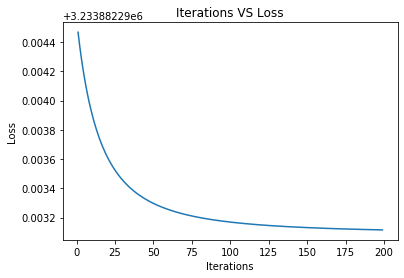

In [23]:
#plot loss graph
plt.plot(list(range(1,len(Loss2))),Loss2[1:])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Iterations VS Loss')
plt.show()

In [65]:
activation_func = 'tanh'
output_func =  'softmax'
NN2Htanh = NeuralNetworkSelect(input_size, 2, hidden_size1, hidden_size2, output_size, learning_rate, activation_func, output_func )

#train data
Loss2tanh, final_output2tanh = NN2Htanh.train(training, denemeTrain_y, epochs=200)

Step :  [3233882.3090817016]
Loss 3233882.309082
Accuracy 0.000000%
Step :  [3233882.3090817016, 3233882.7709151004, 3233893.5485248263, 3233949.6981543563, 3234046.5904572895, 3234006.137370705, 3234061.6604836797, 3234010.878287144, 3234060.3677633638, 3234012.6692947685, 3234059.221153219]
Loss 3234059.221153
Accuracy 0.000000%
Step :  [3233882.3090817016, 3233882.7709151004, 3233893.5485248263, 3233949.6981543563, 3234046.5904572895, 3234006.137370705, 3234061.6604836797, 3234010.878287144, 3234060.3677633638, 3234012.6692947685, 3234059.221153219, 3234014.023247743, 3234058.2756511937, 3234015.100532824, 3234057.4847392016, 3234015.98496941, 3234056.814098991, 3234016.7266867734, 3234056.2387817847, 3234017.3583394564, 3234055.740336019]
Loss 3234055.740336
Accuracy 0.000000%
Step :  [3233882.3090817016, 3233882.7709151004, 3233893.5485248263, 3233949.6981543563, 3234046.5904572895, 3234006.137370705, 3234061.6604836797, 3234010.878287144, 3234060.3677633638, 3234012.6692947685, 3

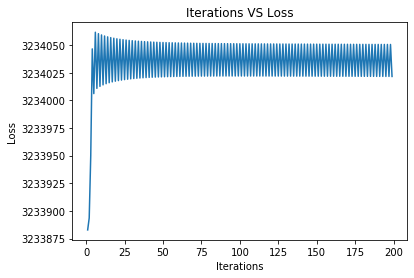

In [66]:
#plot loss graph
plt.plot(list(range(1,len(Loss2tanh))),Loss2tanh[1:])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Iterations VS Loss')
plt.show()

In [67]:
activation_func = 'relu'
output_func =  'softmax'
NN2Hrelu = NeuralNetworkSelect(input_size, 2, hidden_size1, hidden_size2, output_size, learning_rate, activation_func, output_func )

#train data
Loss2relu, final_output2relu = NN2Hrelu.train(training, denemeTrain_y, epochs=200)

Step :  [3233882.301582686]
Loss 3233882.301583
Accuracy 0.000000%
Step :  [3233882.301582686, 3233882.293057454, 3233882.293059359, 3233882.2930614194, 3233882.2930638455, 3233882.2930658134, 3233882.2930669882, 3233882.2930679894, 3233882.2930687508, 3233882.2930693957, 3233882.2930699065]
Loss 3233882.293070
Accuracy 87.600000%
Step :  [3233882.301582686, 3233882.293057454, 3233882.293059359, 3233882.2930614194, 3233882.2930638455, 3233882.2930658134, 3233882.2930669882, 3233882.2930679894, 3233882.2930687508, 3233882.2930693957, 3233882.2930699065, 3233882.293070346, 3233882.293070754, 3233882.2930711894, 3233882.2930714637, 3233882.293071704, 3233882.2930718833, 3233882.2930720286, 3233882.293072173, 3233882.2930723247, 3233882.293072472]
Loss 3233882.293072
Accuracy 91.300000%
Step :  [3233882.301582686, 3233882.293057454, 3233882.293059359, 3233882.2930614194, 3233882.2930638455, 3233882.2930658134, 3233882.2930669882, 3233882.2930679894, 3233882.2930687508, 3233882.2930693957, 

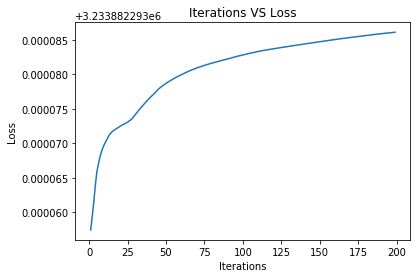

In [68]:
#plot loss graph
plt.plot(list(range(1,len(Loss2relu))),Loss2relu[1:])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Iterations VS Loss')
plt.show()

In [53]:
activation_func = 'sigmoid'
output_func =  'softmax'
NN1Hsig = NeuralNetworkSelect(input_size, 1, hidden_size1, hidden_size2, output_size, learning_rate, activation_func, output_func )

#train data
Loss1sig, final_output1sig = NN1Hsig.train(training, denemeTrain_y, epochs=200)

Step :  [3233927.3819971234]
Loss 3233927.381997
Accuracy 0.000000%
Step :  [3233927.3819971234, 3233927.381973021, 3233927.3819489214, 3233927.3819248215, 3233927.381900723, 3233927.3818766214, 3233927.381852524, 3233927.3818284236, 3233927.381804328, 3233927.381780228, 3233927.381756131]
Loss 3233927.381756
Accuracy 0.000000%
Step :  [3233927.3819971234, 3233927.381973021, 3233927.3819489214, 3233927.3819248215, 3233927.381900723, 3233927.3818766214, 3233927.381852524, 3233927.3818284236, 3233927.381804328, 3233927.381780228, 3233927.381756131, 3233927.381732034, 3233927.381707938, 3233927.381683841, 3233927.381659745, 3233927.3816356515, 3233927.3816115544, 3233927.38158746, 3233927.3815633655, 3233927.381539271, 3233927.381515179]
Loss 3233927.381515
Accuracy 0.000000%
Step :  [3233927.3819971234, 3233927.381973021, 3233927.3819489214, 3233927.3819248215, 3233927.381900723, 3233927.3818766214, 3233927.381852524, 3233927.3818284236, 3233927.381804328, 3233927.381780228, 3233927.3817

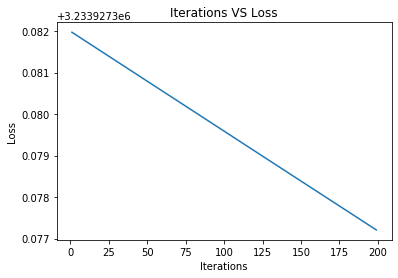

In [54]:
#plot loss graph
plt.plot(list(range(1,len(Loss1sig))),Loss1sig[1:])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Iterations VS Loss')
plt.show()

In [55]:
activation_func = 'tanh'
output_func =  'softmax'
NN1Htanh = NeuralNetworkSelect(input_size, 1, hidden_size1, hidden_size2, output_size, learning_rate, activation_func, output_func )

#train data
Loss1tanh, final_output1tanh = NN1Htanh.train(training, denemeTrain_y, epochs=200)

Step :  [3233908.227530519]
Loss 3233908.227531
Accuracy 0.000000%
Step :  [3233908.227530519, 3233908.227512857, 3233908.227495196, 3233908.2274775333, 3233908.22745987, 3233908.2274422096, 3233908.2274245475, 3233908.227406887, 3233908.2273892243, 3233908.2273715646, 3233908.227353905]
Loss 3233908.227354
Accuracy 0.000000%
Step :  [3233908.227530519, 3233908.227512857, 3233908.227495196, 3233908.2274775333, 3233908.22745987, 3233908.2274422096, 3233908.2274245475, 3233908.227406887, 3233908.2273892243, 3233908.2273715646, 3233908.227353905, 3233908.2273362433, 3233908.2273185803, 3233908.227300921, 3233908.227283261, 3233908.2272656, 3233908.22724794, 3233908.2272302797, 3233908.2272126204, 3233908.2271949598, 3233908.2271773005]
Loss 3233908.227177
Accuracy 0.000000%
Step :  [3233908.227530519, 3233908.227512857, 3233908.227495196, 3233908.2274775333, 3233908.22745987, 3233908.2274422096, 3233908.2274245475, 3233908.227406887, 3233908.2273892243, 3233908.2273715646, 3233908.2273539

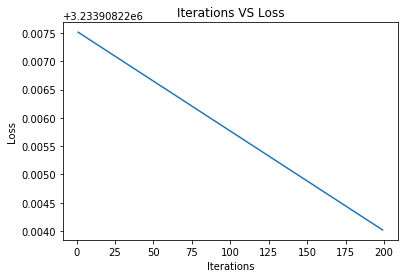

In [56]:
#plot loss graph
plt.plot(list(range(1,len(Loss1tanh))),Loss1tanh[1:])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Iterations VS Loss')
plt.show()

In [59]:
activation_func = 'sig'
output_func =  'softmax'
NNsig = NeuralNetworkSelect(input_size, 0, hidden_size1, hidden_size2, output_size, learning_rate, activation_func, output_func )

#train data
Losssig, final_outputsig = NNsig.train(training, denemeTrain_y, epochs=200)

Step :  [3233981.001631635]
Loss 3233981.001632
Accuracy 0.000000%
Step :  [3233981.001631635, 3233981.0015716045, 3233981.0015115747, 3233981.001451546, 3233981.0013915175, 3233981.0013314933, 3233981.0012714695, 3233981.0012114467, 3233981.0011514276, 3233981.0010914085, 3233981.0010313885]
Loss 3233981.001031
Accuracy 0.000000%
Step :  [3233981.001631635, 3233981.0015716045, 3233981.0015115747, 3233981.001451546, 3233981.0013915175, 3233981.0013314933, 3233981.0012714695, 3233981.0012114467, 3233981.0011514276, 3233981.0010914085, 3233981.0010313885, 3233981.0009713727, 3233981.0009113587, 3233981.0008513452, 3233981.000791334, 3233981.000731322, 3233981.000671315, 3233981.0006113094, 3233981.000551303, 3233981.0004912983, 3233981.000431299]
Loss 3233981.000431
Accuracy 0.000000%
Step :  [3233981.001631635, 3233981.0015716045, 3233981.0015115747, 3233981.001451546, 3233981.0013915175, 3233981.0013314933, 3233981.0012714695, 3233981.0012114467, 3233981.0011514276, 3233981.0010914085,

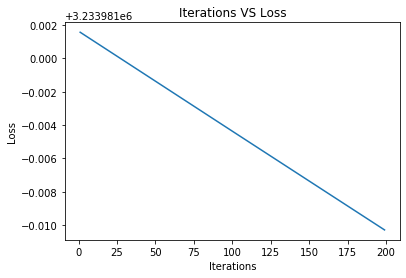

In [60]:
#plot loss graph
plt.plot(list(range(1,len(Losssig))),Losssig[1:])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Iterations VS Loss')
plt.show()

In [61]:
activation_func = 'tanh'
output_func =  'softmax'
NNtanh = NeuralNetworkSelect(input_size, 0, hidden_size1, hidden_size2, output_size, learning_rate, activation_func, output_func )

#train data
Losstanh, final_outputtanh = NNtanh.train(training, denemeTrain_y, epochs=200)

Step :  [3233981.578927073]
Loss 3233981.578927
Accuracy 0.000000%
Step :  [3233981.578927073, 3233981.578867571, 3233981.578808068, 3233981.5787485703, 3233981.578689071, 3233981.578629574, 3233981.578570077, 3233981.578510585, 3233981.578451093, 3233981.5783916, 3233981.5783321117]
Loss 3233981.578332
Accuracy 0.000000%
Step :  [3233981.578927073, 3233981.578867571, 3233981.578808068, 3233981.5787485703, 3233981.578689071, 3233981.578629574, 3233981.578570077, 3233981.578510585, 3233981.578451093, 3233981.5783916, 3233981.5783321117, 3233981.5782726244, 3233981.5782131376, 3233981.5781536517, 3233981.5780941695, 3233981.5780346896, 3233981.5779752065, 3233981.5779157295, 3233981.577856252, 3233981.5777967777, 3233981.577737304]
Loss 3233981.577737
Accuracy 0.000000%
Step :  [3233981.578927073, 3233981.578867571, 3233981.578808068, 3233981.5787485703, 3233981.578689071, 3233981.578629574, 3233981.578570077, 3233981.578510585, 3233981.578451093, 3233981.5783916, 3233981.5783321117, 323

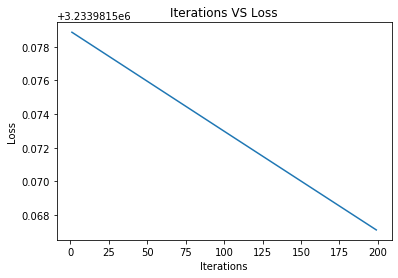

In [62]:
#plot loss graph
plt.plot(list(range(1,len(Losstanh))),Losstanh[1:])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Iterations VS Loss')
plt.show()

In [63]:
activation_func = 'relu'
output_func =  'softmax'
NNrelu = NeuralNetworkSelect(input_size, 0, hidden_size1, hidden_size2, output_size, learning_rate, activation_func, output_func )

#train data
Lossrelu, final_outputrelu = NNrelu.train(training, denemeTrain_y, epochs=200)

Step :  [3233982.0614437438]
Loss 3233982.061444
Accuracy 0.000000%
Step :  [3233982.0614437438, 3233982.061375048, 3233982.061306352, 3233982.061237656, 3233982.061168963, 3233982.0611002734, 3233982.0610315837, 3233982.0609628963, 3233982.060894211, 3233982.060825523, 3233982.0607568426]
Loss 3233982.060757
Accuracy 0.000000%
Step :  [3233982.0614437438, 3233982.061375048, 3233982.061306352, 3233982.061237656, 3233982.061168963, 3233982.0611002734, 3233982.0610315837, 3233982.0609628963, 3233982.060894211, 3233982.060825523, 3233982.0607568426, 3233982.0606881594, 3233982.0606194795, 3233982.060550802, 3233982.0604821243, 3233982.060413448, 3233982.0603447743, 3233982.060276103, 3233982.060207432, 3233982.0601387606, 3233982.060070093]
Loss 3233982.060070
Accuracy 0.000000%
Step :  [3233982.0614437438, 3233982.061375048, 3233982.061306352, 3233982.061237656, 3233982.061168963, 3233982.0611002734, 3233982.0610315837, 3233982.0609628963, 3233982.060894211, 3233982.060825523, 3233982.06

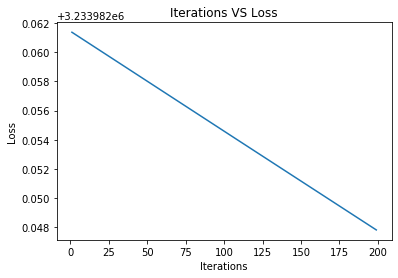

In [64]:
#plot loss graph
plt.plot(list(range(1,len(Lossrelu))),Lossrelu[1:])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Iterations VS Loss')
plt.show()